## Data Cleaning with Pandas

### Questions
- Numerical vs Categorical columns
    - How is numerical defined? 
    - When are the statistics important for these types of columns?
    - How does one handle null values and placeholders?
- How does one identify placeholders vs a legitimiate data point
- How does one filter a dataframe using conditionals? 
    - Specify rows based on conditions

### Objectives
YWBAT 
* describe and apply strategies for handling null values
* "" for handling placeholders
* "" normalizing and standardizing data
* use method chaining to store slices of data to variables
* explain the importance of method chaining
* apply the groupby method to create a new dataframe
* Identify hidden null values using the `.value_counts()` method
* Filter datasets based on boolean conditionals 
* Apply string methods to a pandas series
* Create histograms

### Outline
* Loading the Data
* Exploratory Data Analysis
* Counting Null Values
* Summarizing Data with Groupby 
* Data Integrety: Analyzing the Impact of Erroneous Null Placeholder Values
* Filtering DataFrames
* Dealing With Null Values
    * Imputing
    * Dropping
* Changing Column Names
* Histograms and Other Visualizations
* Appendix

### Loading the Data

First, we'll import our dataset which we'll be exploring. The dataset contains information about super heros and their powers. We'll import pandas and our other common package tools and then load the dataset stored in the `'super_hero_powers.csv'` file.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv("super_hero_powers.csv")
df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Exploratory Data Analysis

You can check some quick details for the dataframe using `df.info()`. If there aren't too many columns, you'll also get details regarding the column data type and the number of non-null entries.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


In [3]:
df[df.columns[:10]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 10 columns):
hero_names               667 non-null object
Agility                  667 non-null bool
Accelerated Healing      667 non-null bool
Lantern Power Ring       667 non-null bool
Dimensional Awareness    667 non-null bool
Cold Resistance          667 non-null bool
Durability               667 non-null bool
Stealth                  667 non-null bool
Energy Absorption        667 non-null bool
Flight                   667 non-null bool
dtypes: bool(9), object(1)
memory usage: 11.2+ KB


### Count the null values in 'Agility' column

In [4]:
len(df[df['Agility'].isna()]) #Subset the dataframe and check it's length

0

> **Teacher Notes**:
    * This can be posed as a question or can be demonstrated as direct instruction for students. Either way, pose the generalized version of this below as a question to check for student understanding.

### Print any column that has a null value

In [5]:
for column in df.columns:
    if df[column].isna().sum() > 0:
        print(column)

### Load in heros_information.csv

In [6]:
df2 = pd.read_csv("heroes_information.csv", index_col=0)
df2.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 63.1+ KB


### What does 'object' dtype indicate?

> A: Text, dictionary

### Identify columns with null values

In [8]:
df2.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

**Fetch the null values in the Publisher column**

In [9]:
df2[df2.Publisher.isna()==True]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
46,Astro Boy,Male,brown,-,Black,-99.0,NaN,-,good,-99.0
86,Bionic Woman,Female,blue,Cyborg,Black,-99.0,NaN,-,good,-99.0
138,Brundlefly,Male,-,Mutant,-,193.0,NaN,-,-,-99.0
175,Chuck Norris,Male,-,-,-,178.0,NaN,-,good,-99.0
204,Darkside,-,-,-,-,-99.0,NaN,-,bad,-99.0
244,Ethan Hunt,Male,brown,Human,Brown,168.0,NaN,-,good,-99.0
263,Flash Gordon,Male,-,-,-,-99.0,NaN,-,good,-99.0
286,Godzilla,-,-,Kaiju,-,108.0,NaN,grey,bad,NaN
348,Jack Bauer,Male,-,-,-,-99.0,NaN,-,good,-99.0
354,Jason Bourne,Male,-,Human,-,-99.0,NaN,-,good,-99.0


## What would you do at this point if Publisher was important?


## Teacher Notes
* replace NaN with 'Unknown'
* delete the rows, but we lose the data
* manually input them, since there are only 15

Discuss the pros/cons of the various approaches.

In [10]:
# this is how we would manually input 'Dark Horse Comics' into the 'Astro Boy' row

df2.loc[df2.name=='Astro Boy', 'Publisher'] = 'Dark Horse Comics'

In [11]:
# you can fill nulls this way but it's better to use the .fillna method
df2.Publisher = df2.Publisher.fillna(value='Null')


## Finding Hidden Null Values

Sometime, while not explicitly missing, there are null values such as `999` hidden within a dataset. A good preliminary check is to look at the most common values for a column.

In [12]:
df2.name.value_counts().head() # you can apply a .head() to a Series object

Spider-Man        3
Goliath           3
Captain Marvel    2
Batman            2
Nova              2
Name: name, dtype: int64

### Use a for loop to print out the top 5 values for each column. Do you notice any suspicious entries?

In [13]:
for col in df2.columns:
    print(col,'\n', df2[col].value_counts().head(), '\n\n')

name 
 Spider-Man        3
Goliath           3
Captain Marvel    2
Batman            2
Nova              2
Name: name, dtype: int64 


Gender 
 Male      505
Female    200
-          29
Name: Gender, dtype: int64 


Eye color 
 blue     225
-        172
brown    126
green     73
red       46
Name: Eye color, dtype: int64 


Race 
 -                304
Human            208
Mutant            63
God / Eternal     14
Cyborg            11
Name: Race, dtype: int64 


Hair color 
 -          172
Black      158
Blond       99
Brown       86
No Hair     75
Name: Hair color, dtype: int64 


Height 
 -99.0     217
 183.0     59
 188.0     51
 178.0     39
 180.0     38
Name: Height, dtype: int64 


Publisher 
 Marvel Comics        388
DC Comics            215
Dark Horse Comics     19
NBC - Heroes          19
George Lucas          14
Name: Publisher, dtype: int64 


Skin color 
 -        662
green     21
red        9
blue       9
white      7
Name: Skin color, dtype: int64 


Alignment 
 good     

# Teacher Notes

Be sure students notice entries like `-` and `-99`; these should be interpreted as null values.

## Aggregate Statistics 

In analyzing your data, you will frequently want to calculate summary statistics. After all, with a large dataset, it is difficult or impossible to examine all of the individual observations. Instead, we must use various perspectives, statistics and visualizations to examine the data.

To start, let's take a look at how you could calculate the mean or median of a feature.

## Series Methods

First, you can call `.mean()` or `.median()` directly on a pandas series, or even multiple columns:

In [14]:
df2[['Height', 'Weight']].mean()

Height    102.254087
Weight     43.855191
dtype: float64

More generally, you can also use the `.agg()` method and specify multiple aggregations such as 'mean', 'median', 'mode', or 'count'.

In [30]:
df2.agg(['mean', 'median'])

,Height,Weight
mean,102.254087,43.855191
median,175.000000,62.000000


In [31]:
df2.mode()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,Goliath,Male,blue,-,-,-99.0,Marvel Comics,-,good,-99.0
1,Spider-Man,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Using Groupby

You can also look at distributions and statistics within groups from the dataset.

In [32]:
df2.groupby('Eye color').mean()

,Height,Weight
Eye color,,
-,-55.517442,-72.461988
amber,186.500000,117.000000
black,93.826087,9.000000
blue,150.374222,73.222222
blue / white,155.000000,79.000000
bown,-99.000000,-99.000000
brown,147.626984,71.420635
gold,215.333333,180.333333
green,142.582192,81.506849


## Chaining Methods

You can also then sort these results and limit the length we preview:

In [34]:
df2.groupby('Eye color').mean().sort_values(by=['Height', 'Weight']).head(10)

,Height,Weight
Eye color,,
bown,-99.000000,-99.000000
-,-55.517442,-72.461988
black,93.826087,9.000000
grey,138.833333,78.833333
green,142.582192,81.506849
white,146.958824,39.117647
brown,147.626984,71.420635
blue,150.374222,73.222222
violet,155.000000,49.000000


## Analyzing Publishers

Which publisher has the tallest superheros?

> **Teacher Notes**:
There are different ways to approach this. You could interpret the question as referring to any aggregate statistics including the mean, median or maximum from any given group. Two examples are included below.

In [42]:
df2.groupby('Publisher')['Height'].max().sort_values(ascending=False).head(1)

Publisher
Marvel Comics    975.0
Name: Height, dtype: float64

In [43]:
df2.groupby('Publisher')['Height'].mean().sort_values(ascending=False).head(1)

Publisher
J. R. R. Tolkien    279.0
Name: Height, dtype: float64

## Analyzing the Impact of Null Values

How do you think the hidden null values impacted your summary statistics for height and weight above?

> A: The -99 values dramatically lowered the true mean values.

## Appropriately Flagging Null Values

While null values aren't ideal, it's good to at least be able to easily identify them. Let's look at how you could quickly replace some of those hiddnen null values.

In [44]:
df2.Height.replace(to_replace=-99.0, value=np.nan, inplace=True)

## Check that the -99 values were removed from the Height column

In [45]:
df2.Height.value_counts().head()

183.0    59
188.0    51
178.0    39
180.0    38
185.0    35
Name: Height, dtype: int64

## Replace the hidden null values in the weight column (and verify the change).

In [46]:
df2.Weight.replace(to_replace=-99.0, value=np.nan, inplace=True)

In [47]:
df2.Height.value_counts(sort=True, ascending=False).head()

183.0    59
188.0    51
178.0    39
180.0    38
185.0    35
Name: Height, dtype: int64

## Recalculate the Mean Height and Weight

In [48]:
df2[['Height', 'Weight']].mean()

Height    186.726306
Weight    112.252525
dtype: float64

### Methods for handling numerical nulls

Rather then leaving values as null, sometimes we may also wish to **impute** values by using an average value.

In [49]:
# replace with 0
df2['Height'].replace(to_replace=np.nan, value=0, inplace=True)
df2.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,0.0,Marvel Comics,-,bad,NaN


In [50]:
# replace with the mean Height
mean_height = 186.72630560928434
df2['Height'].replace(to_replace=0.0, value=mean_height, inplace=True)

df2.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.000000,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.000000,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.000000,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.000000,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,186.726306,Marvel Comics,-,bad,NaN


In [51]:
# replace with normal distribution of random numbers

mean_height = df2.Height.mean()
std_height = df2.Height.std()
num_missing = df2.Height.isna().sum()

new_values = np.random.normal(mean_height, std_height, num_missing)

df2.loc[df2.Height.isna(), 'Height'] = new_values

df2.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.000000,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.000000,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.000000,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.000000,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,186.726306,Marvel Comics,-,bad,NaN


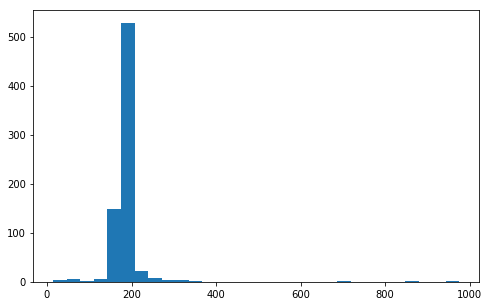

In [52]:
plt.figure(figsize=(8, 5))
plt.hist(df2.Height, bins=30)
plt.show()

### How can we filter placeholders?

Possible response:  


It's generally best to replace placeholders with null values via `np.nan` so that filtering null values is more straight forward and efficient.

## Replace all of the missing values from the `Skin color` feature with null values.

In [53]:
df2['Skin color'].value_counts().head()

-        662
green     21
red        9
blue       9
white      7
Name: Skin color, dtype: int64

In [54]:
df2["Skin color"].replace(to_replace="-", value=np.nan, inplace=True)

In [55]:
df2['Skin color'].value_counts().head()

green    21
red       9
blue      9
white     7
grey      5
Name: Skin color, dtype: int64

In [56]:
df2["Skin color"].unique() # quick scan for placeholders

array([nan, 'blue', 'red', 'black', 'grey', 'gold', 'green', 'white',
       'pink', 'silver', 'red / black', 'yellow', 'purple',
       'orange / white', 'gray', 'blue-white', 'orange'], dtype=object)

## Repeat this for the other features with placeholders for null values

In [57]:
df2.Gender.unique()

array(['Male', 'Female', '-'], dtype=object)

In [58]:
df2["Gender"].replace(to_replace="-", value=np.nan, inplace=True)

In [59]:
df2["Eye color"].replace(to_replace="-", value=np.nan, inplace=True)

In [60]:
df2["Race"].replace(to_replace="-", value=np.nan, inplace=True)

In [61]:
df2["Hair color"].replace(to_replace="-", value=np.nan, inplace=True)

In [62]:
df2["Alignment"].replace(to_replace="-", value=np.nan, inplace=True)

### Generalizing the Procedure

If you are sure that '-' is an invalid response for all features, you could also more simply and uniformly loop through all of the columns:

```python
for col in df2.columns:
    df2[col].replace(to_replace="-", value=np.nan, inplace=True)
```

Although you can also apply this method more directly to the entire DataFrame rather then an individual series:

```python
df2.replace(to_replace=["-", -99.0], value=np.nan, inplace=True)
```

In [63]:
df2.isnull().sum()

name            0
Gender         29
Eye color     172
Race          304
Hair color    172
Height          0
Publisher       0
Skin color    662
Alignment       7
Weight        239
dtype: int64

## Other Options for Dealing with Null Values

* Dropping Features
* Imputing Null Values
    * Mean
    * Median
    * Regression
    * Other

## Other Options for Dealing with Null Values - Teacher Notes
* Dropping Features
    When there is a preposterous number of null values, a column may not prove useful for analysis or modeling. (While you are losing information, you may also be able to draw a clearer picture and focus attention on relevant details.)
    
    Ex: 
    (Also included in the cell below)
    ```python
    df2 = df2.drop("Skin color", axis=1)
    ```
* Imputing Null Values
    You can also fill the null values of a column by **imputing** them from other observation rows that are populated. For instance, you could uniformly impute all null values using the column mean, median or mode. Alternatively, a more complex procedure might create a regression model to impute null values based on the other auxillary features for that observation row. Imputing has advantages and disadvantages. On the one had, it prevents us from dropping features all together and allows features to be incorporated in later modeling stages. However, there is also a cost. Imputing the mean median or mode will reduce variance of a feature. Regression procedures for imputing null values will also cause increased correlation between features.
    * Mean
    * Median
    * Regression
    * Other

In [64]:
#dropping a feature
df2 = df2.drop("Skin color", axis=1)
df2.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.000000,Marvel Comics,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.000000,Dark Horse Comics,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.000000,DC Comics,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.000000,Marvel Comics,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,186.726306,Marvel Comics,bad,NaN


## Now that my dataframe is cleaned, I'm going to save it as a clean file

In [65]:
df2.to_csv("./cleaned_heroes_information.csv", index=False) 
# This will create the dataframe without the index column (which is currently just a range of 0 to len(df)-1)

In [66]:
df3 = pd.read_csv("./cleaned_heroes_information.csv")
df3.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.000000,Marvel Comics,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.000000,Dark Horse Comics,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.000000,DC Comics,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.000000,Marvel Comics,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,186.726306,Marvel Comics,bad,NaN


## Renaming Columns with Spaces

Spaces in naming conventions are the bane of any programmer. How are you supposed to use tab completion or dot notation with those pesky spaces?! Using your knowledge of string methods and list comprehensions, create an updated list of column names that replaces all internal whitespace for a column name with dashes ('-').

In [67]:
renamed_cols = [col.lower().replace(" ", "_") for col in df3.columns]
print(renamed_cols)

['name', 'gender', 'eye_color', 'race', 'hair_color', 'height', 'publisher', 'alignment', 'weight']


Great! With this you now couild rename the columns directly using `df3.columns = renamed_cols`. But, let's be a little more verbose and practice our data manipulation skills! Create a dictionary using the `zip` method which maps the original column names to the reformatted column names you just made above.

> Hint: Pull up the docstring for the `zip` method with `zip?` if you are unsure how to use it. If you're still stuck, try experimenting a little or use a search engine to find further advice.

In [68]:
name_mapper = dict(zip(df3.columns, renamed_cols))

name_mapper

{'name': 'name',
 'Gender': 'gender',
 'Eye color': 'eye_color',
 'Race': 'race',
 'Hair color': 'hair_color',
 'Height': 'height',
 'Publisher': 'publisher',
 'Alignment': 'alignment',
 'Weight': 'weight'}

Awesome! Now rename the columns using the `.rename()` method on the DataFrame. Again, pull up the docstring with `df3.rename?` to help guide yourself. 

> Note: Again, you could have also renamed the columns directly with the original list you created above: `df3.columns = renamed_cols`. Nonetheless, try the `.rename()` method for further practice.

In [69]:
df3.rename(mapper=name_mapper, axis=1, inplace=True)
df3.head()

,name,gender,eye_color,race,hair_color,height,publisher,alignment,weight
0,A-Bomb,Male,yellow,Human,No Hair,203.000000,Marvel Comics,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.000000,Dark Horse Comics,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.000000,DC Comics,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.000000,Marvel Comics,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,186.726306,Marvel Comics,bad,NaN


### Converting all lettering to lowercase

Practice your string methods and data wrangling some more! Convert all of the text data to lower case.

In [70]:
for column in df3.columns:
    if df3[column].dtype=='O':
        df3[column] = df3[column].str.lower()
        
df3.head()

,name,gender,eye_color,race,hair_color,height,publisher,alignment,weight
0,a-bomb,male,yellow,human,no hair,203.000000,marvel comics,good,441.0
1,abe sapien,male,blue,icthyo sapien,no hair,191.000000,dark horse comics,good,65.0
2,abin sur,male,blue,ungaran,no hair,185.000000,dc comics,good,90.0
3,abomination,male,green,human / radiation,no hair,203.000000,marvel comics,bad,441.0
4,abraxas,male,blue,cosmic entity,black,186.726306,marvel comics,bad,NaN


### Histogram

Lastly, let's practice making some histograms of feature distributions.

Plot the heights of all of the super heros.

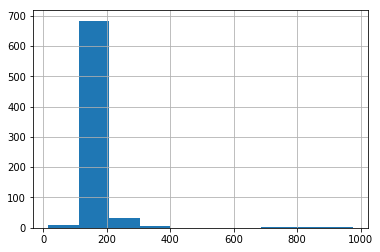

In [71]:
df3.height.hist()

# Comparing Male and Female Heights

What kind of visual would you use to compare male and female heights? Experiment with a few different plots and choose the one which you think best compares these two distributions.

## Teacher Notes

Posing the question open endedly in this fashion leaves room for a discussion and comparison of various approaches. For example, you might plot two histograms side by side using subplots, plot two box plots side by side, or something else. Some visualizations will lend themselves better to this application then others and comparing various visual representations should be a useful exercise for students thinking about the data and how to best present it.

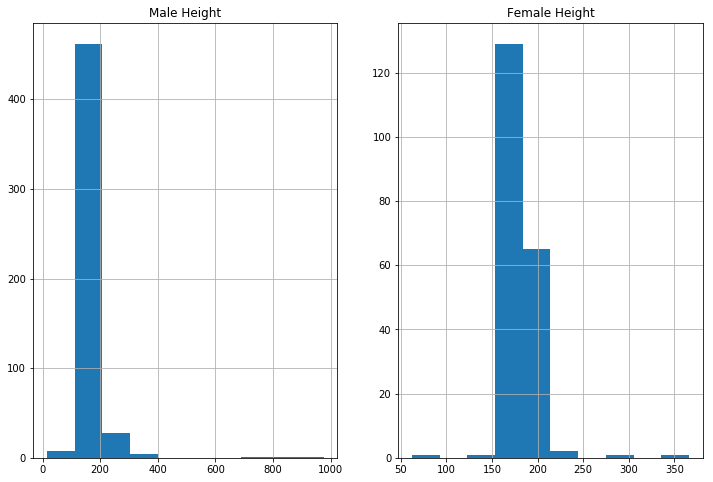

In [72]:
males = df3[df3.gender == 'male']
females = df3[df3.gender == 'female']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
males.height.hist(ax=axes[0])
ax1 = axes[0]
ax1.set_title('Male Height')
females.height.hist(ax=axes[1]);
ax2 = axes[1]
ax2.set_title('Female Height');

Text(0,0.5,'Height')

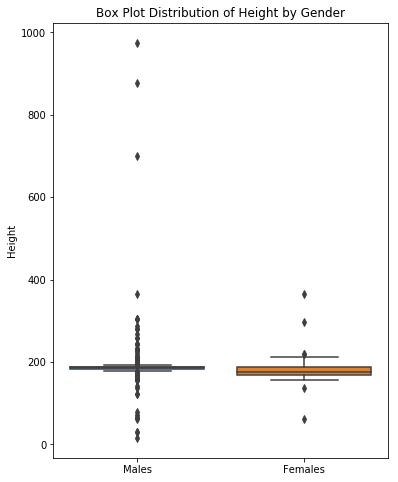

In [73]:
import seaborn as sns
plt.figure(figsize=(6,8))
sns.boxplot(data=[males.height, females.height])
plt.xticks(plt.xticks()[0], ['Males', 'Females'])
plt.title('Box Plot Distribution of Height by Gender')
plt.ylabel('Height')

Text(0,0.5,'Height')

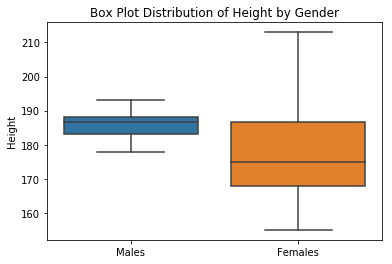

In [74]:
sns.boxplot(data=[males.height, females.height], showfliers=False) #Removing outliers
plt.xticks(plt.xticks()[0], ['Males', 'Females'])
plt.title('Box Plot Distribution of Height by Gender')
plt.ylabel('Height')

In [75]:
def plot_sns_hist(df, col):
    plt.figure(figsize=(8, 5))
    plt.grid()
    sns.distplot(df[col].dropna(), bins=20)
    plt.show()

/Users/matthew.mitchell/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


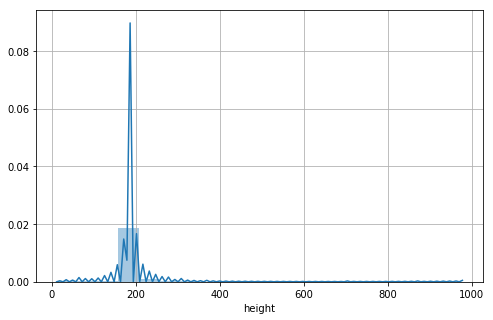

In [76]:
plot_sns_hist(males, 'height')

/Users/matthew.mitchell/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


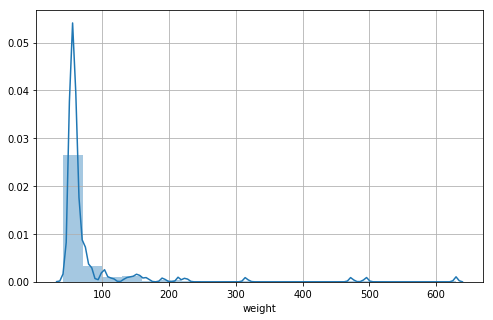

In [77]:
plot_sns_hist(females, 'weight')

### Assessment

### What did I learn?

I learned...
- that the replace function allows you to replace values in either the dataframe or a series of the dataframe
- you can search/group information based on data types by pulling the column then searching in the series
- null values can be used in ways that are meaningful, they aren't always bad. 

## Appendix

## What are the 10 most common super-hero races? What percentage of super-heros does this account for?

In [78]:
df2.Race.value_counts().head(10)

Human                208
Mutant                63
God / Eternal         14
Cyborg                11
Human / Radiation     11
Symbiote               9
Android                9
Alien                  7
Kryptonian             7
Demon                  6
Name: Race, dtype: int64

In [79]:
df2.Race.value_counts(normalize=True).cumsum().head(10)

Human                0.483721
Mutant               0.630233
God / Eternal        0.662791
Cyborg               0.688372
Human / Radiation    0.713953
Symbiote             0.734884
Android              0.755814
Alien                0.772093
Kryptonian           0.788372
Demon                0.802326
Name: Race, dtype: float64

## What do you notice about the answer above?

## Splitting Entries with Concatenated Fields

Sometimes you may also need to split data from a column. Some common examples are splitting a lattitude/longitude field into two seperate fields, or splitting an address field into street, city, state and zipcode. 

Create your own value counts dictionary by iterating through the `Race` series and splitting apart multiple entries.

In [80]:
value_counts = {}
for obs in df2[~df2.Race.isnull()]['Race']:
    for r in obs.split('/'):
        r = r.strip()
        value_counts[r] = value_counts.get(r, 1) + 1 #Get previous entry and add 1; if no entry default to 0.
value_counts = pd.DataFrame.from_dict(value_counts, orient='index') #Convert to DataFrame so we can sort by count
value_counts.head()

,0
Human,226
Icthyo Sapien,2
Ungaran,2
Radiation,12
Cosmic Entity,5


In [81]:
value_counts.columns = ['Count']
value_counts = value_counts.sort_values(by='Count', ascending=False)
value_counts.head(10)

,Count
Human,226
Mutant,65
Eternal,17
God,15
Radiation,12
Cyborg,12
Symbiote,10
Android,10
Kryptonian,8
Alien,8


### Gathering columns of similar data types

In [82]:
all_boolean_columns = []

for column in df.columns:
    if df[column].dtype != bool:
        all_boolean_columns.append(column)

        
all_boolean_columns

['hero_names']

In [83]:
for column in df.columns:
    if df[column].dtype == bool:
        continue
    else:
        print(column)

hero_names


### Let's make a column with superpowers!!!!
* column name = superpowers
* dtype = list
* list populated by strings

In [84]:
df.shape, df3.shape

((667, 168), (734, 9))

In [85]:
hero = df3.name[0]
hero

'a-bomb'

In [86]:
hero_row = df.loc[df["hero_names"].str.lower()==hero].drop('hero_names', axis=1)
hero_row

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
1,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [87]:
hero_super_powers = []
for col in hero_row.columns:
    if hero_row[col].values[0] == True:
        hero_super_powers.append(col)

In [88]:
hero_super_powers

['Accelerated Healing',
 'Durability',
 'Longevity',
 'Super Strength',
 'Stamina',
 'Camouflage',
 'Self-Sustenance']

In [89]:
heros = {}
# {hero_name: [list of powers]}
for index, row in df.iterrows():
    powers = []
    for col in row.index[1:]:
        if row[col] == True:
            powers.append(col.lower())
    heros[row.values[0].lower()] = powers
heros

{'3-d man': ['agility', 'super strength', 'stamina', 'super speed'],
 'a-bomb': ['accelerated healing',
  'durability',
  'longevity',
  'super strength',
  'stamina',
  'camouflage',
  'self-sustenance'],
 'abe sapien': ['agility',
  'accelerated healing',
  'cold resistance',
  'durability',
  'underwater breathing',
  'marksmanship',
  'weapons master',
  'longevity',
  'intelligence',
  'super strength',
  'telepathy',
  'stamina',
  'immortality',
  'reflexes',
  'enhanced sight',
  'sub-mariner'],
 'abin sur': ['lantern power ring'],
 'abomination': ['accelerated healing',
  'intelligence',
  'super strength',
  'stamina',
  'super speed',
  'invulnerability',
  'animation',
  'super breath'],
 'abraxas': ['dimensional awareness',
  'flight',
  'intelligence',
  'super strength',
  'size changing',
  'super speed',
  'teleportation',
  'magic',
  'dimensional travel',
  'immortality',
  'invulnerability',
  'molecular manipulation',
  'energy manipulation',
  'power cosmic'],
 'a

In [90]:
powers_column = []

In [91]:
for name in df3.name:
    powers = heros.get(name, None)
    powers_column.append(powers)
powers_column

[['accelerated healing',
  'durability',
  'longevity',
  'super strength',
  'stamina',
  'camouflage',
  'self-sustenance'],
 ['agility',
  'accelerated healing',
  'cold resistance',
  'durability',
  'underwater breathing',
  'marksmanship',
  'weapons master',
  'longevity',
  'intelligence',
  'super strength',
  'telepathy',
  'stamina',
  'immortality',
  'reflexes',
  'enhanced sight',
  'sub-mariner'],
 ['lantern power ring'],
 ['accelerated healing',
  'intelligence',
  'super strength',
  'stamina',
  'super speed',
  'invulnerability',
  'animation',
  'super breath'],
 ['dimensional awareness',
  'flight',
  'intelligence',
  'super strength',
  'size changing',
  'super speed',
  'teleportation',
  'magic',
  'dimensional travel',
  'immortality',
  'invulnerability',
  'molecular manipulation',
  'energy manipulation',
  'power cosmic'],
 ['cold resistance',
  'durability',
  'energy absorption',
  'super strength',
  'invulnerability',
  'elemental transmogrification',

In [92]:
df3["superpowers"] = powers_column
df3.head()

,name,gender,eye_color,race,hair_color,height,publisher,alignment,weight,superpowers
0,a-bomb,male,yellow,human,no hair,203.000000,marvel comics,good,441.0,"[accelerated healing, durability, longevity, s..."
1,abe sapien,male,blue,icthyo sapien,no hair,191.000000,dark horse comics,good,65.0,"[agility, accelerated healing, cold resistance..."
2,abin sur,male,blue,ungaran,no hair,185.000000,dc comics,good,90.0,[lantern power ring]
3,abomination,male,green,human / radiation,no hair,203.000000,marvel comics,bad,441.0,"[accelerated healing, intelligence, super stre..."
4,abraxas,male,blue,cosmic entity,black,186.726306,marvel comics,bad,NaN,"[dimensional awareness, flight, intelligence, ..."
